In [310]:
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [311]:
#Load data
fraud_det = pd.read_csv("data.csv")
fraud_det.shape

(19999, 10)

In [312]:
fraud_det.head(5)

,id,dist_latest_transaction_address_km,email,application_date,site_visits_A,site_visits_B,site_visits_C,credit_limit,number_of_transactions,is_fraud
0,0,2.0,djellybrande2@yolasite.com,2019-03-17 03:57:12.247891,0.0,0.0,0.0,"$1,032.00",23.0,0.0
1,1,4.0,vbohlerkx@soundcloud.com,2019-02-02 13:28:13.611142,8.0,1.0,1.0,"$1,601.50",25.0,0.0
2,2,4.0,aocurraneba@discuz.net,2019-03-23 20:40:31.035168,7.0,1.0,1.0,"$1,293.69",25.0,0.0
3,3,1.0,ojane18@tuttocitta.it,2019-02-08 18:39:17.996564,4.0,0.0,0.0,"$1,007.86",19.0,0.0
4,4,1.0,wdemeadc@alexa.com,2019-02-08 15:53:42.666945,28.0,1.0,1.0,"$1,027.03",17.0,0.0


# EDA & Pre Processing

In [313]:
fraud_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 10 columns):
id                                    19999 non-null int64
dist_latest_transaction_address_km    19999 non-null object
email                                 19991 non-null object
application_date                      19999 non-null object
site_visits_A                         19998 non-null float64
site_visits_B                         19998 non-null float64
site_visits_C                         19998 non-null float64
credit_limit                          19998 non-null object
number_of_transactions                19998 non-null float64
is_fraud                              19998 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [314]:
#percentage of fraud count
row_count = len(fraud_det)
fraud = fraud_det['is_fraud'].value_counts()
fraud_count = fraud[1]
fraud_percent = (fraud_count  / row_count) * 100
fraud_percent

3.6851842592129604

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


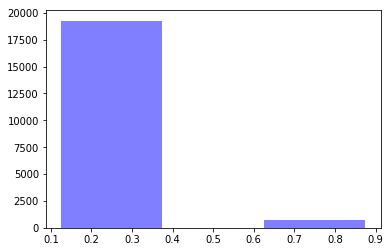

In [315]:
#distribution of target
%matplotlib inline

num_bins = 2
plt.hist(fraud_det['is_fraud'], num_bins, rwidth = 0.5, facecolor='blue', alpha=0.5)
plt.show()

In [316]:
# Converting to the required formats
fraud_det.application_date = pd.to_datetime(fraud_det.application_date, errors='coerce')
#cab_fare['passenger_count'] = pd.Categorical(cab_fare.passenger_count)


In [317]:
#Replacing unknown values to zeros andconverting to numeric
fraud_det.loc[fraud_det['dist_latest_transaction_address_km'] == 'unknown']
fraud_det['dist_latest_transaction_address_km'].replace('unknown', 0,inplace=True)
fraud_det['dist_latest_transaction_address_km'] = pd.to_numeric(fraud_det['dist_latest_transaction_address_km'])

# MISSING VALUE ANALYSIS

In [318]:
#Calculating the null values in the dataframe
missing_val = pd.DataFrame(fraud_det.isnull().sum())
missing_val = (missing_val/len(fraud_det))*100
missing_val.reset_index()

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percent'})
missing_val

,Missing_percent
id,0.000000
dist_latest_transaction_address_km,0.000000
email,0.040002
application_date,0.005000
site_visits_A,0.005000
site_visits_B,0.005000
site_visits_C,0.005000
credit_limit,0.005000
number_of_transactions,0.005000
is_fraud,0.005000


In [319]:
#For site A,B,C :
print('Site_A:{}'.format(fraud_det['site_visits_A'].loc[99]))
fraud_det['site_visits_A'].loc[99] = np.nan
#Impute using mean
print('Mean imputation:{}'.format(fraud_det['site_visits_A'].fillna(fraud_det['site_visits_A'].mean()).loc[99]))
#Impute using median
print('Median imputation:{}'.format(fraud_det['site_visits_A'].fillna(fraud_det['site_visits_A'].median()).loc[99]))

print('Site_B:{}'.format(fraud_det['site_visits_B'].loc[99]))
fraud_det['site_visits_B'].loc[99] = np.nan
#Impute using mean
print('Mean imputation:{}'.format(fraud_det['site_visits_B'].fillna(fraud_det['site_visits_B'].mean()).loc[99]))
#Impute using median
print('Median imputation:{}'.format(fraud_det['site_visits_B'].fillna(fraud_det['site_visits_B'].median()).loc[99]))

print('Site_C:{}'.format(fraud_det['site_visits_C'].loc[99]))
fraud_det['site_visits_C'].loc[99] = np.nan
#Impute using mean
print('Mean imputation:{}'.format(fraud_det['site_visits_C'].fillna(fraud_det['site_visits_C'].mean()).loc[99]))
#Impute using median
print('Median imputation:{}'.format(fraud_det['site_visits_C'].fillna(fraud_det['site_visits_C'].median()).loc[99]))



Site_A:2.0
Mean imputation:9.200930139520928
Median imputation:6.0
Site_B:2.0
Mean imputation:0.9737460619092864
Median imputation:1.0
Site_C:2.0
Mean imputation:0.9795469320398059
Median imputation:1.0


C:\Anaconda\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [320]:
print('Transactions:{}'.format(fraud_det['number_of_transactions'].loc[99]))
fraud_det['site_visits_B'].loc[99] = np.nan
#Impute using mean
print('Mean imputation:{}'.format(fraud_det['number_of_transactions'].fillna(fraud_det['number_of_transactions'].mean()).loc[99]))
#Impute using median
print('Median imputation:{}'.format(fraud_det['number_of_transactions'].fillna(fraud_det['number_of_transactions'].median()).loc[99]))


Transactions:21.0
Mean imputation:21.0
Median imputation:21.0


In [321]:
#Impute missing values for every column
fraud_det['site_visits_A'] = fraud_det['site_visits_A'].fillna(fraud_det['site_visits_A'].median())
fraud_det['site_visits_B'] = fraud_det['site_visits_B'].fillna(fraud_det['site_visits_B'].median())
fraud_det['site_visits_C'] = fraud_det['site_visits_C'].fillna(fraud_det['site_visits_C'].median())
fraud_det['number_of_transactions'] = fraud_det['number_of_transactions'].fillna(fraud_det['number_of_transactions'].median())
fraud_det['is_fraud'] = fraud_det['is_fraud'].fillna(fraud_det['is_fraud'].median())
#fraud_det['credit_limit'] = fraud_det['credit_limit'].fillna(fraud_det['credit_limit'].median())


In [322]:
#dropping null application date, credit_limit and email
fraud_det = fraud_det.dropna()

In [323]:
fraud_det.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19990 entries, 0 to 19998
Data columns (total 10 columns):
id                                    19990 non-null int64
dist_latest_transaction_address_km    19990 non-null float64
email                                 19990 non-null object
application_date                      19990 non-null datetime64[ns]
site_visits_A                         19990 non-null float64
site_visits_B                         19990 non-null float64
site_visits_C                         19990 non-null float64
credit_limit                          19990 non-null object
number_of_transactions                19990 non-null float64
is_fraud                              19990 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.7+ MB


In [324]:
#removing dollar sign
fraud_det.credit_limit = [x.strip('$') for x in fraud_det.credit_limit]

In [325]:
email = pd.DataFrame(fraud_det['email'])
fraud_det = fraud_det.drop(['email'], axis=1)

# outlier analysis

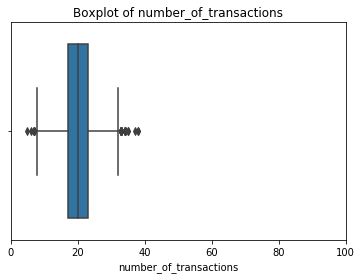

In [326]:
#box plot
import seaborn as sns
plt.xlim(0,100)
sns.boxplot(x=fraud_det['number_of_transactions'],data=fraud_det)
plt.title('Boxplot of number_of_transactions')
plt.show()

In [327]:
cnames=['dist_latest_transaction_address_km','site_visits_A','site_visits_B','site_visits_C','number_of_transactions']
#detect & delete outliers
for i in cnames:
    print(i)
    q75, q25 = np.percentile(fraud_det.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    fraud_det = fraud_det.drop(fraud_det[fraud_det.loc[:,i] < min].index)
    fraud_det = fraud_det.drop(fraud_det[fraud_det.loc[:,i] > max].index)

dist_latest_transaction_address_km
-8.0
16.0
site_visits_A
-12.0
28.0
site_visits_B
-1.5
2.5
site_visits_C
-1.5
2.5
number_of_transactions
8.0
32.0


In [328]:
fraud_det.shape

(16815, 9)

# feature selection

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


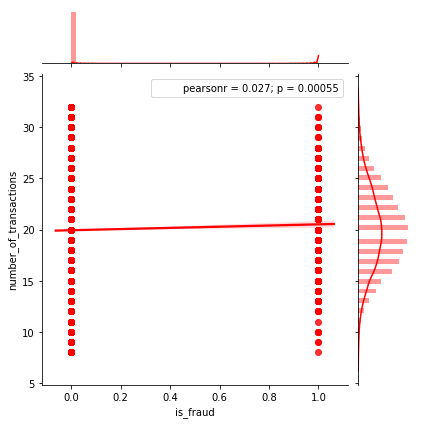

In [329]:
#Bi varient analysis
import scipy.stats as stats
p2 = sns.jointplot(x='is_fraud',y='number_of_transactions',data=fraud_det,kind = 'reg',dropna = True,color = 'red')
p2.annotate(stats.pearsonr)
plt.show()

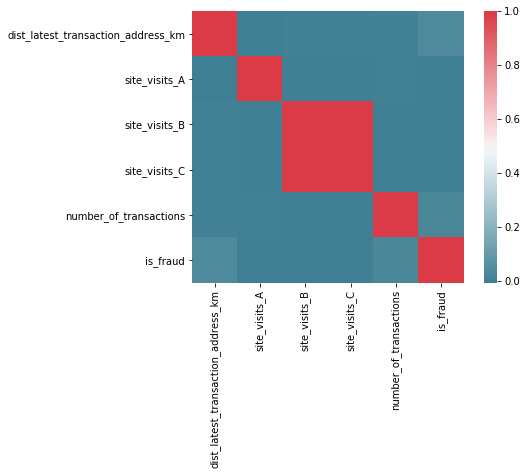

In [330]:
#Feature selection(Correlation, multicollinearity)
#Correlation Plot
cnames1=['dist_latest_transaction_address_km','site_visits_A','site_visits_B','site_visits_C','number_of_transactions','is_fraud']
corr = fraud_det.loc[:,cnames1]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr1 = corr.corr()

#Plot using seaborn library
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [331]:
fraud_det = fraud_det.drop(['site_visits_C',],axis = 1)

In [332]:
#multi collinearity check
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
output,predictors = dmatrices('is_fraud ~ dist_latest_transaction_address_km+number_of_transactions+site_visits_A+site_visits_B',fraud_det, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,30.083877,Intercept
1,1.000079,dist_latest_transaction_address_km
2,1.000040,number_of_transactions
3,1.000039,site_visits_A
4,1.000031,site_visits_B


# normality check

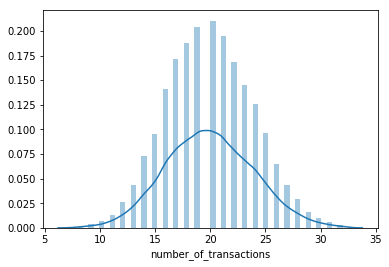

In [333]:
#normality check
sns.distplot(fraud_det['number_of_transactions'],bins=50)

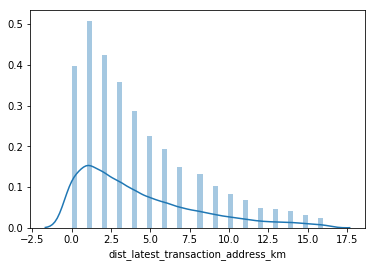

In [334]:
#normality check
sns.distplot(fraud_det['dist_latest_transaction_address_km'],bins=50)

In [335]:
#dummies for credit_limit
fraud_det = pd.concat([fraud_det.join(pd.get_dummies(fraud_det.credit_limit))], axis=1)

In [336]:
fraud_det.shape

(16815, 15512)

In [337]:

fraud_det

,id,dist_latest_transaction_address_km,application_date,site_visits_A,site_visits_B,credit_limit,number_of_transactions,is_fraud,"1,000.01","1,000.02",...,"4,609.35","4,623.71","4,629.80","4,737.60","4,805.89","4,963.59","4,973.61","6,089.69","6,536.63","7,355.72"
0,0,2.0,2019-03-17 03:57:12.247891,0.0,0.0,"1,032.00",23.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.0,2019-02-02 13:28:13.611142,8.0,1.0,"1,601.50",25.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4.0,2019-03-23 20:40:31.035168,7.0,1.0,"1,293.69",25.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,2019-02-08 18:39:17.996564,4.0,0.0,"1,007.86",19.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1.0,2019-02-08 15:53:42.666945,28.0,1.0,"1,027.03",17.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,2.0,2019-03-03 20:57:51.756079,2.0,1.0,"1,568.00",28.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,16.0,2019-03-14 02:23:44.364015,24.0,1.0,"1,127.23",14.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,1.0,2019-02-13 22:18:18.422714,9.0,0.0,"1,119.22",17.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,2.0,2019-02-08 02:26:32.544875,0.0,1.0,"1,007.80",30.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,1.0,2019-02-22 06:42:59.512795,8.0,2.0,"1,766.31",17.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
fraud_det = fraud_det.drop(['credit_limit'], axis=1)


In [339]:
fraud1_det = pd.DataFrame(fraud_det['application_date'])
fraud_det = fraud_det.drop(['application_date'], axis = 1)



In [340]:
df = pd.DataFrame(fraud_det)
fraud_det = fraud_det.drop(['is_fraud'],axis=1)

# Model Development

In [341]:
#Dividing into train and test
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = fraud_det
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=1)


In [342]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# fit the model with data
log_reg.fit(X_train,y_train)

#prediction
y_pred=log_reg.predict(X_test)

In [343]:
#metrics
from sklearn import metrics
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12993,     0],
       [  459,     0]], dtype=int64)

In [344]:
#Decision tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Pred = C50_model.predict(X_test)

In [345]:
#Confusion matrix
cnf_matrix_dt = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_dt

array([[12993,     0],
       [  459,     0]], dtype=int64)

In [346]:
#Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.965878679750223
Precision: 0.0
Recall: 0.0
AUC:

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.5


In [347]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [348]:
RF_Pred = RF_model.predict(X_test)

In [349]:
cnf_matrix_rf = metrics.confusion_matrix(y_test, RF_Pred)
cnf_matrix_rf

array([[12993,     0],
       [  459,     0]], dtype=int64)

In [350]:
#Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.965878679750223
Precision: 0.0
Recall: 0.0
AUC: 0.5


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [356]:
pred_results = pd.DataFrame({"is_fraud" : RF_Pred})
pred_results.to_csv("predictions.csv",index=False)

In [360]:
#XGBOOST
import xgboost as xgb
from xgboost import XGBClassifier
Xgb = XGBClassifier()
Xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [361]:
xg_pred = Xgb.predict(X_test)

In [362]:
#Metrics
print("Accuracy:",metrics.accuracy_score(y_test, xg_pred))
print("Precision:",metrics.precision_score(y_test, xg_pred))
print("Recall:",metrics.recall_score(y_test, xg_pred))
print("AUC:", metrics.roc_auc_score(y_test, xg_pred))

Accuracy: 0.965878679750223
Precision: 0.0
Recall:

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.0
AUC: 0.5


In [363]:
#Saving the model
import pickle
filename = 'finalized_model.sav'
pickle.dump(Xgb, open(filename, 'wb'))